In [ ]:
!pip install torch torchvision torchaudio

In [ ]:
!git clone https://github.com/ultralytics/yolov5

In [ ]:
pip install -r requirements.txt 

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [2]:
import uuid   # Unique identifier
import os
import time

In [ ]:
import glob
import os
import pickle
import xml.etree.ElementTree as ET
from os import listdir, getcwd
from os.path import join

dirs = ['JPEGImages']
classes = ['fire']

def getImagesInDir(dir_path):
    image_list = []
    for filename in glob.glob(dir_path + '/*.jpg'):
        image_list.append(filename)

    return image_list

def convert(size, box):
    dw = 1./(size[0])
    dh = 1./(size[1])
    x = (box[0] + box[1])/2.0 - 1
    y = (box[2] + box[3])/2.0 - 1
    w = box[1] - box[0]
    h = box[3] - box[2]
    x = x*dw
    w = w*dw
    y = y*dh
    h = h*dh
    return (x,y,w,h)

def convert_annotation(dir_path, output_path, image_path):
    basename = os.path.basename(image_path)
    basename_no_ext = os.path.splitext(basename)[0]

    in_file = open(dir_path + '/' + basename_no_ext + '.xml')
    out_file = open(output_path + basename_no_ext + '.txt', 'w')
    tree = ET.parse(in_file)
    root = tree.getroot()
    size = root.find('size')
    w = int(size.find('width').text)
    h = int(size.find('height').text)

    for obj in root.iter('object'):
        difficult = obj.find('difficult').text
        cls = obj.find('name').text
        if cls not in classes or int(difficult)==1:
            continue
        cls_id = classes.index(cls)
        xmlbox = obj.find('bndbox')
        b = (float(xmlbox.find('xmin').text), float(xmlbox.find('xmax').text), float(xmlbox.find('ymin').text), float(xmlbox.find('ymax').text))
        bb = convert((w,h), b)
        out_file.write(str(cls_id) + " " + " ".join([str(a) for a in bb]) + '\n')

cwd = '/Users/divyanshyadav/Downloads/VOC2020'

for dir_path in dirs:
    full_dir_path = cwd + '/' + dir_path
    output_path = full_dir_path +'/yolo/'

    if not os.path.exists(output_path):
        os.makedirs(output_path)

    image_paths = getImagesInDir(full_dir_path)
    list_file = open(full_dir_path + '.txt', 'w')

    for image_path in image_paths:
        list_file.write(image_path + '\n')
        convert_annotation(full_dir_path, output_path, image_path)
    list_file.close()

    print("Finished processing: " + dir_path)

In [ ]:
IMAGES_PATH = os.path.join('data', 'train') #/data/images
labels = ['awake', 'drowsy']
# number_imgs = 5

In [ ]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [ ]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

In [ ]:
!git clone https://github.com/tzutalin/labelImg

In [ ]:
!pip install --upgrade pyqt5 lxml


In [3]:
LABELIMG_PATH = os.path.join('data', 'labeling')

In [4]:
if not os.path.exists(LABELIMG_PATH):
    !mkdir {LABELIMG_PATH}
    !git clone https://github.com/tzutalin/labelImg {LABELIMG_PATH}

In [5]:
if os.name == 'posix':
    !cd {LABELIMG_PATH} && make qt5py3

pyrcc5 -o libs/resources.py resources.qrc


In [ ]:
!cd {LABELIMG_PATH} && python labelImg.py

Image:/Users/divyanshyadav/Desktop/untitled folder 3/Screenshot 2023-07-12 at 6.23.15 PM.png -> Annotation:/Users/divyanshyadav/Desktop/untitled folder 3/Screenshot 2023-07-12 at 6.23.15 PM.txt
[('stone', [(1282, 1681), (1458, 1681), (1458, 1908), (1282, 1908)], None, None, False), ('stone', [(1647, 1756), (1766, 1756), (1766, 1970), (1647, 1970)], None, None, False), ('stone', [(1361, 575), (1736, 575), (1736, 1081), (1361, 1081)], None, None, False), ('stone', [(1385, 1105), (1820, 1105), (1820, 1332), (1385, 1332)], None, None, False), ('stone', [(1890, 670), (2244, 670), (2244, 1018), (1890, 1018)], None, None, False)]
ESC press
Cancel creation.
Image:/Users/divyanshyadav/Desktop/untitled folder 3/Screenshot 2023-07-12 at 6.23.30 PM.png -> Annotation:/Users/divyanshyadav/Desktop/untitled folder 3/Screenshot 2023-07-12 at 6.23.30 PM.txt
Image:/Users/divyanshyadav/Desktop/untitled folder 3/Screenshot 2023-07-12 at 6.23.34 PM.png -> Annotation:/Users/divyanshyadav/Desktop/untitled fol

Image:/Users/divyanshyadav/Desktop/untitled folder 3/Screenshot 2023-07-12 at 6.25.31 PM.png -> Annotation:/Users/divyanshyadav/Desktop/untitled folder 3/Screenshot 2023-07-12 at 6.25.31 PM.txt
Image:/Users/divyanshyadav/Desktop/untitled folder 3/Screenshot 2023-07-12 at 6.25.32 PM.png -> Annotation:/Users/divyanshyadav/Desktop/untitled folder 3/Screenshot 2023-07-12 at 6.25.32 PM.txt
Image:/Users/divyanshyadav/Desktop/untitled folder 3/Screenshot 2023-07-12 at 6.25.32 PM.png -> Annotation:/Users/divyanshyadav/Desktop/untitled folder 3/Screenshot 2023-07-12 at 6.25.32 PM.txt
Image:/Users/divyanshyadav/Desktop/untitled folder 3/Screenshot 2023-07-12 at 6.25.34 PM 1.png -> Annotation:/Users/divyanshyadav/Desktop/untitled folder 3/Screenshot 2023-07-12 at 6.25.34 PM 1.txt
Image:/Users/divyanshyadav/Desktop/untitled folder 3/Screenshot 2023-07-12 at 6.25.34 PM 1.png -> Annotation:/Users/divyanshyadav/Desktop/untitled folder 3/Screenshot 2023-07-12 at 6.25.34 PM 1.txt
Image:/Users/divyanshy

In [ ]:
!cd yolov5 && python train.py --img 320 --batch 20 --epochs 10 --data dataset8.yml --weights yolov5s.pt --workers 2

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp34/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/divyanshyadav/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-7-14 Python-3.9.12 torch-2.0.1 CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [4]:
img = os.path.join('data3', 'images', 'Screenshot 2023-07-05 102126.png')

In [5]:
img = '/Users/divyanshyadav/Downloads/forest.jpg'

In [6]:
results = model(img)

In [7]:
results.print()

image 1/1: 1533x3815 7 smokes
Speed: 231.2ms pre-process, 55.4ms inference, 0.9ms NMS per image at shape (1, 3, 288, 640)


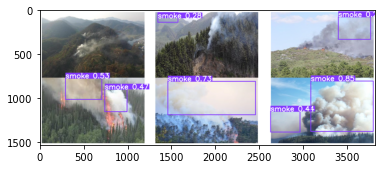

In [8]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
cap = cv2.VideoCapture('/Users/divyanshyadav/Downloads/Untitled.mp4')
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:

def POINTS(event, x, y, flags, param):
    if event == cv2.EVENT_MOUSEMOVE :  
        colorsBGR = [x, y]
        print(colorsBGR)
        

cv2.namedWindow('ROI')
cv2.setMouseCallback('ROI', POINTS)

cap=cv2.VideoCapture('/Users/divyanshyadav/Downloads/liv.mp4')




In [5]:
cap=cv2.VideoCapture('/Users/divyanshyadav/Desktop/Untitled.mov')
count=0
last_motion_time = time.time()
machine_running = True
d=''
while True:
    ret,frame=cap.read()
    results = model(frame)
    for index, row in results.pandas().xyxy[0].iterrows():
        x1 = int(row['xmin'])
        y1 = int(row['ymin'])
        x2 = int(row['xmax'])
        y2 = int(row['ymax'])
        d=(row['name'])
        print(d)
        cv2.rectangle(frame,(x1,y1),(x2,y2),(0,255,0),2)
#     if d=='cavity':
#         last_motion_time = time.time()
#         machine_running = True
#     elif time.time() - last_motion_time > 5:
#         machine_running = False
#     label = "Machine Running" if machine_running else "Machine Not Running"
#     cv2.putText(frame, label, (450,420), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.imshow("ROI",frame)
    if cv2.waitKey(1000)&0xFF==27:
        break
        
cap.release()
cv2.destroyAllWindows()

stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone


KeyboardInterrupt: 

In [12]:
import cv2
cap=cv2.VideoCapture('/Users/divyanshyadav/Desktop/Untitled.mov')
while True:
    ret,frame=cap.read()
    frame = cv2.resize(frame, (1080, 720))
    roi=frame[500:590,270:880]
    
    cv2.imshow("roi",roi)
    if cv2.waitKey(1000)&0xFF==27:
             break
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

video_path = "/Users/divyanshyadav/Desktop/Untitled.mov"

# Open the video file
cap = cv2.VideoCapture(video_path)

# Check if the video file was successfully opened
if not cap.isOpened():
    print("Error opening video file:", video_path)
    exit()

# Get the original width and height of the video
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Create a background subtractor
mog = cv2.createBackgroundSubtractorMOG2()

# Initialize variables for machine running state
last_motion_time = time.time()
machine_running = True

# Create a window to display the output
cv2.namedWindow('Motion Detection', cv2.WINDOW_NORMAL)

while True:
    # Read a frame from the video
    ret, frame = cap.read()

    # If the frame was not successfully read, exit the loop
    if not ret:
        break
    frame = cv2.resize(frame, (1080, 720))
    roi = frame[500:620,250:880]

    roi1=frame[500:590,270:880]
    # Convert the frame to grayscale
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

    # Apply background subtraction
    fgmask = mog.apply(gray)

    # Perform morphological operations
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    fgmask = cv2.erode(fgmask, kernel, iterations=1)
    fgmask = cv2.dilate(fgmask, kernel, iterations=1)

    # Find contours
    contours, hierarchy = cv2.findContours(fgmask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Check if there are any significant motions
    motion_detected = False
    for contour in contours:
        # Ignore small contours
        if cv2.contourArea(contour) < 1000:
            continue

        # Draw bounding box around contour
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(roi, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Motion detected
        motion_detected = True
    
    
    # Update machine running state based on motion detection
    if motion_detected:
        last_motion_time = time.time()
        machine_running = True
    elif time.time() - last_motion_time > 7:
        machine_running = False
    results = model(roi1)
    
    for index, row in results.pandas().xyxy[0].iterrows():
        x1 = int(row['xmin'])
        y1 = int(row['ymin'])
        x2 = int(row['xmax'])
        y2 = int(row['ymax'])
        d=(row['name'])
        print(d)
        cv2.rectangle(roi1,(x1,y1),(x2,y2),(0,255,0),2)
    # Add machine running label on top right of the frame
    if d=='stone' and machine_running==True:
        label = "Machine Running"
    elif machine_running==True and d!='stone':
        label = "Jamming"
    elif machine_running==False and d=='stone':
        label = "Jamming"
#     label = "Machine Running" if machine_running else "Machine Not Running"
#     cv2.putText(frame, label, (450,420), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
#     label = "Machine Running" if machine_running else "Machine Not Running"
    cv2.putText(frame, label, (450,420), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)

    # Resize the frame to match the original dimensions
    frame = cv2.resize(frame, (width, height))

    # Display the frame with bounding rectangles and machine running label
    cv2.imshow('Motion Detection', frame)

    # Check if the 'q' key is pressed
    if cv2.waitKey(1) == ord('q'):
        break

# Release the video capture object and close windows
cap.release()
cv2.destroyAllWindows()

stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
stone
ston

KeyboardInterrupt: 